In [1]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load the data set containing durations between calls arriving at the call
# center during 1 day. All values are in minutes.
waiting_times_day = np.loadtxt('call_center.csv')

# Display some basic information about the data set.
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

Size of data set: 5856
First 3 values in data set: [ 30.    3.4   3.2]
Sum of data set: 1441.68381538


Since the values are intervals between calls measured in minutes, this means

we assume the first call happened at 00:00 (midnight),
the second call happened at about 00:30 (30 minutes after midnight),
the third call happened at about 00:33 (30 + 3.4 minutes),
the fourth call happened at about 00:37, etc.
When we sum the values, we get about 1440 minutes (1 day).

You are told that the number of calls arriving varies quite a lot, depending on which hour of the day it is. The smallest number of calls usually occur around 3am or 4am. Most calls usually come in between 11am and 1pm.

## Data pre-processing

Since we expect different call rates during different hours, we split the data set into 24 separate series — one for each hour of the day.

In [3]:
# Make 24 empty lists, one per hour.
waiting_times_per_hour = [[] for _ in range(24)]

# Split the data into 24 separate series, one for each hour of the day.
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

for hour, calls_in_hour in enumerate(waiting_times_per_hour):
    print(f'{hour:02}:00-{hour + 1:02}:00 - {len(calls_in_hour)} calls')

00:00-01:00 - 5 calls
01:00-02:00 - 4 calls
02:00-03:00 - 6 calls
03:00-04:00 - 8 calls
04:00-05:00 - 26 calls
05:00-06:00 - 53 calls
06:00-07:00 - 93 calls
07:00-08:00 - 173 calls
08:00-09:00 - 254 calls
09:00-10:00 - 345 calls
10:00-11:00 - 496 calls
11:00-12:00 - 924 calls
12:00-13:00 - 858 calls
13:00-14:00 - 382 calls
14:00-15:00 - 185 calls
15:00-16:00 - 207 calls
16:00-17:00 - 263 calls
17:00-18:00 - 419 calls
18:00-19:00 - 531 calls
19:00-20:00 - 400 calls
20:00-21:00 - 137 calls
21:00-22:00 - 51 calls
22:00-23:00 - 20 calls
23:00-24:00 - 16 calls



## Task 1: Plot the number of calls per hour

Use Matplotlib to visualize the number of calls that arrive during each hour of the day, stored in the variable waiting_times_per_hour. The call numbers are shown in the output above. You should find an appropriate way to visualize it.

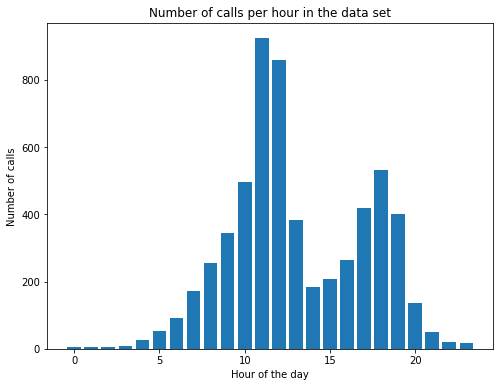

In [4]:
# Plot the number of calls per hour using a bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(24), [len(w) for w in waiting_times_per_hour])
plt.xlabel('Hour of the day')
plt.ylabel('Number of calls')
plt.title('Number of calls per hour in the data set')
plt.show()


## Task 2: Plot a histogram of the durations for one hour

Take the data for the 9th hour (so between 9am and 10am) and plot a histogram showing the distribution over waiting times between calls during that hour.

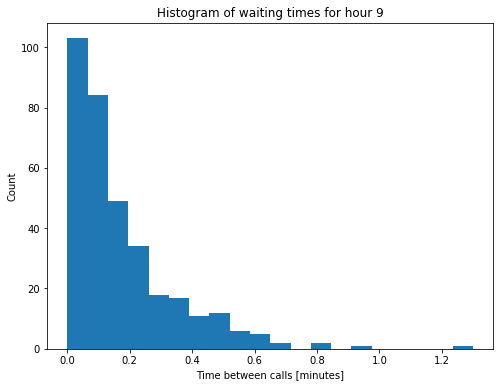

In [5]:
# Plot histogram of waiting times for one hour
hour_index = 9
waiting_times_hour = waiting_times_per_hour[hour_index]

plt.figure(figsize=(8, 6))
plt.hist(waiting_times_hour, bins=20)
plt.xlabel('Time between calls [minutes]')
plt.ylabel('Count')
plt.title(f'Histogram of waiting times for hour {hour_index}')
plt.show()


## Task 1: Fit an exponential distribution to the data for hour 9
We do Bayesian inference on this problem
Use the exponential distribution as your likelihood function.
You need to fill in the likelihood function below.
Using a gamma distribution with parameters \alpha=1α=1 and \beta=0.25β=0.25 as the prior distribution. 
You need to fill in the prior function below.
Compute the posterior distribution over \lambdaλ.
Plot the prior and posterior distributions on the same axes.

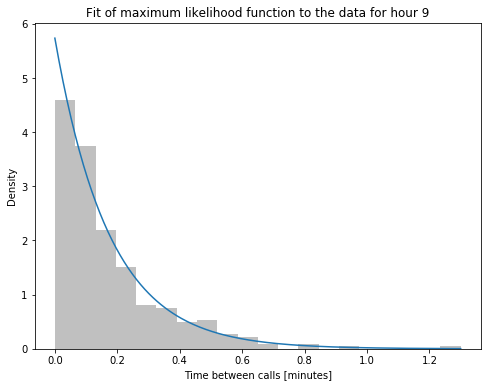

In [6]:
# Exponential distribution with maximum likelihood fit to the data
lambda_ = 1 / np.mean(waiting_times_hour)
distribution = sts.expon(scale=1 / lambda_)

plt.figure(figsize=(8, 6))
plt.hist(waiting_times_hour, bins=20, density=True, color='#c0c0c0')
x = np.linspace(0, max(waiting_times_hour), 200)
y = distribution.pdf(x)
plt.plot(x, y)
plt.xlabel('Time between calls [minutes]')
plt.ylabel('Density')
plt.title(f'Fit of maximum likelihood function to the data for hour {hour_index}')
plt.show()

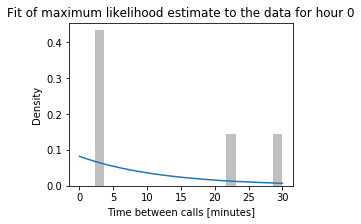

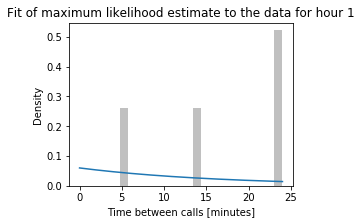

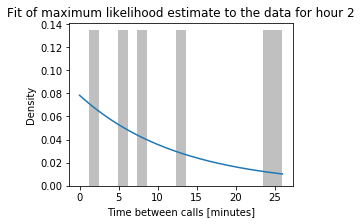

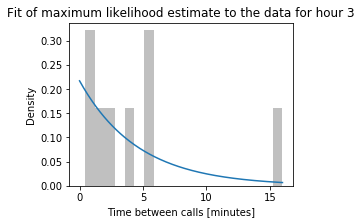

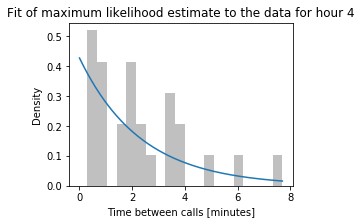

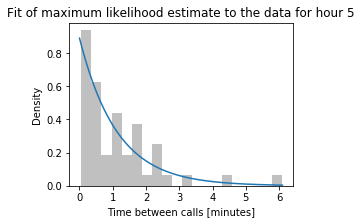

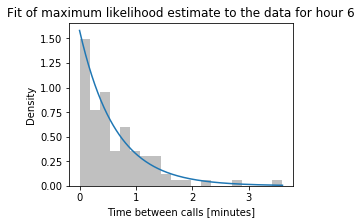

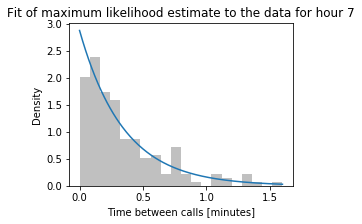

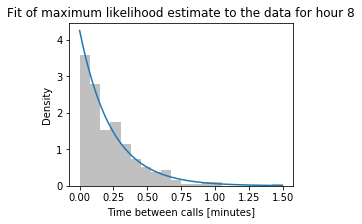

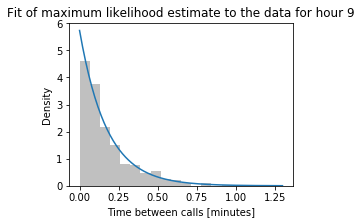

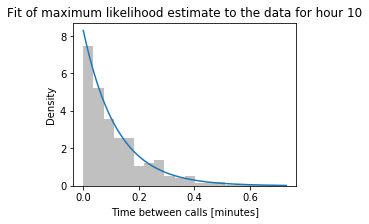

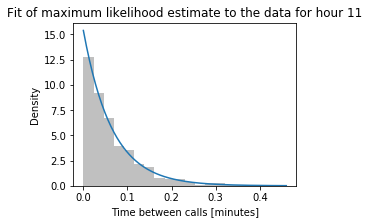

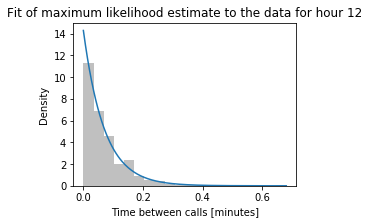

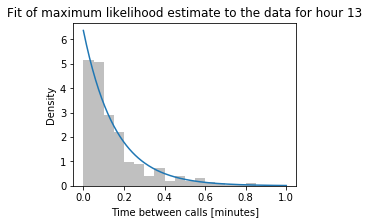

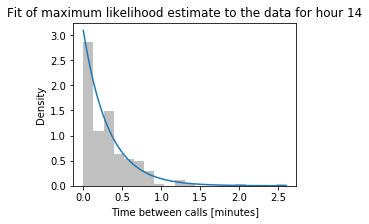

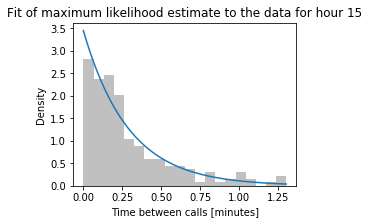

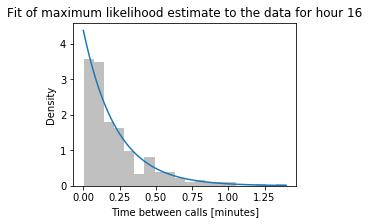

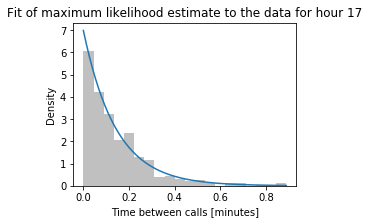

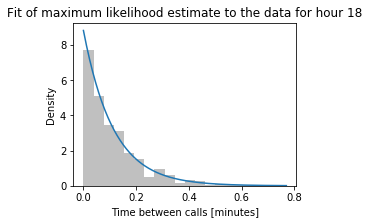

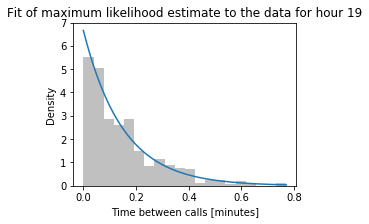

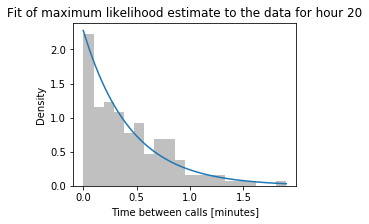

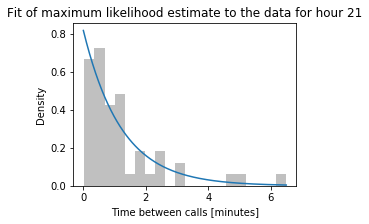

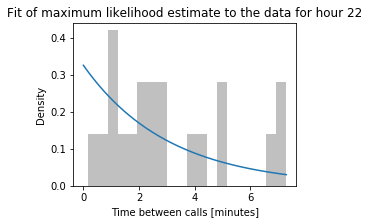

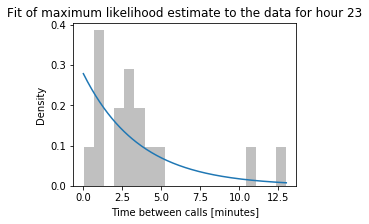

In [7]:
for hour_index in range(0, 24, 1):
    waiting_times_hour = waiting_times_per_hour[hour_index]
    lambda_ = 1 / np.mean(waiting_times_hour)
    distribution = sts.expon(scale=1/lambda_)
    plt.figure(figsize=(4, 3))
    plt.hist(waiting_times_hour, bins=20, density=True, color='#c0c0c0')
    x = np.linspace(0, max(waiting_times_hour), 200)
    y = distribution.pdf(x)
    plt.plot(x, y)
    plt.xlabel('Time between calls [minutes]')
    plt.ylabel('Density')
    plt.title(f'Fit of maximum likelihood estimate to the data for hour {hour_index}')
    plt.show()

## 1. Call center data modeling
Complete the call center data modeling assignment we start in the Pre-class work and Activity 2 breakouts of Session 2.2. You may re-use and build on all code or any other work from the class session.
In class, we completed the Bayesian data modeling problem for 1 hour of the day. In this assignment, you need to do the same analysis for all 24 hours of the day.

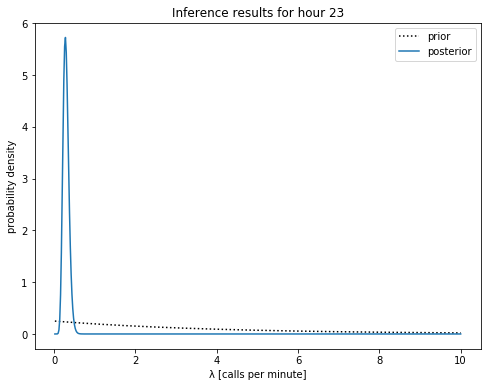

In [9]:
# DEFINE THE LIKELIHOOD FUNCTION
#
# This function takes 2 inputs, namely the parameter (λ) value at which to
# compute the likelihood and a value from the data set. You need to evaluate
# the exponential distribution of the datum given the parameter value.
def likelihood(lambda_, datum):
    return sts.expon(scale=1/lambda_).pdf(datum)

# THE POSTERIOR DISTRIBUTION
#
# The function below is provided to help make computing the posterior easier. It
# follows the same pattern as in the previous class, where we multiple the prior
# and the likelihood evaluated at various values of the parameter (λ).
#
# You will see the function uses the logarithms of various distributions. This
# is for numerical reasons. When you multiply lots of likelihood values, the
# result can become very large or very small, causing numerical overflow or
# underflow in Python. Taking logarithms avoids this problem.


def compute_posterior(parameter_values, prior, likelihood, data):
    log_prior = np.log(prior(parameter_values))
    log_likelihood = np.array([
        np.sum(np.log(likelihood(param, data)))
        for param in parameter_values])
    unnormalized_log_posterior = log_prior + log_likelihood
    unnormalized_log_posterior -= max(unnormalized_log_posterior)
    unnormalized_posterior = np.exp(unnormalized_log_posterior)
    area = sp.integrate.trapz(unnormalized_posterior, parameter_values)
    posterior = unnormalized_posterior / area
    return posterior

posterior = compute_posterior(lambdas, prior, likelihood, waiting_times_hour)

# YOU NEED TO PLOT THE PRIOR AND POSTERIOR ON THE SAME AXES.
plt.figure(figsize=(8, 6))
plt.plot(lambdas, prior(lambdas), color='black', linestyle=':', label='prior')
plt.plot(lambdas, posterior, label='posterior')
plt.xlabel('λ [calls per minute]')
plt.ylabel('probability density')
plt.title(f'Inference results for hour {hour_index}')
plt.legend()
plt.show()

Compute a 98% confidence interval over the posterior \lambdaλ. Use the code provided below to help you.
Discuss the width of the confidence interval. How certain are we about the call rate during this hour of the day?

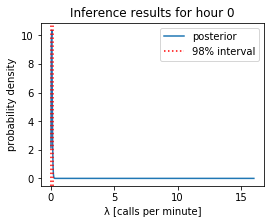

Expected value: λ = 0.100311312114 calls per minute
Posterior 98% interval: [0.032000000000000001, 0.192] calls per minute


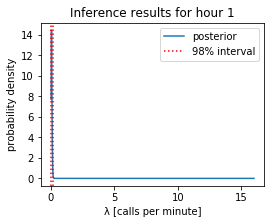

Expected value: λ = 0.0793032534974 calls per minute
Posterior 98% interval: [0.032000000000000001, 0.16] calls per minute


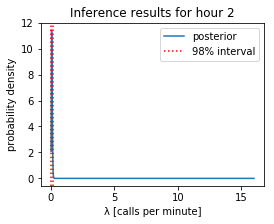

Expected value: λ = 0.093085757281 calls per minute
Posterior 98% interval: [0.032000000000000001, 0.192] calls per minute


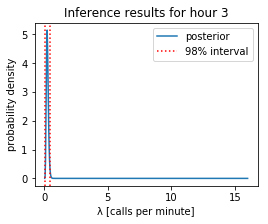

Expected value: λ = 0.242656612577 calls per minute
Posterior 98% interval: [0.064000000000000001, 0.44800000000000001] calls per minute


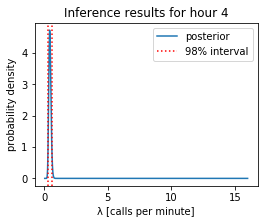

Expected value: λ = 0.442332896461 calls per minute
Posterior 98% interval: [0.25600000000000001, 0.64000000000000001] calls per minute


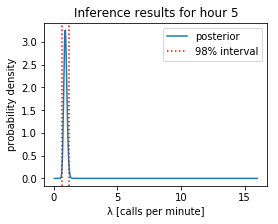

Expected value: λ = 0.90331214453 calls per minute
Posterior 98% interval: [0.64000000000000001, 1.1839999999999999] calls per minute


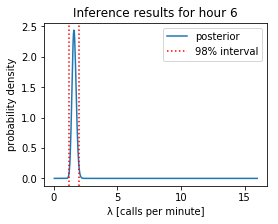

Expected value: λ = 1.59118755643 calls per minute
Posterior 98% interval: [1.216, 1.984] calls per minute


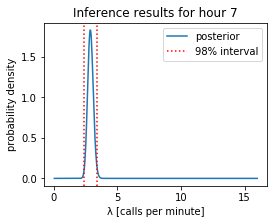

Expected value: λ = 2.88100696161 calls per minute
Posterior 98% interval: [2.3679999999999999, 3.3919999999999999] calls per minute


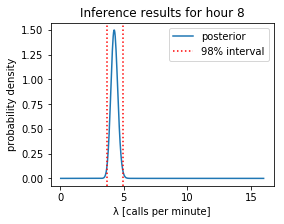

Expected value: λ = 4.25692459735 calls per minute
Posterior 98% interval: [3.6480000000000001, 4.8959999999999999] calls per minute


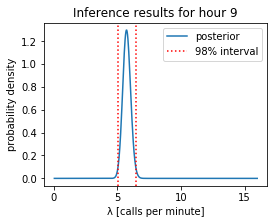

Expected value: λ = 5.72869591536 calls per minute
Posterior 98% interval: [5.024, 6.4640000000000004] calls per minute


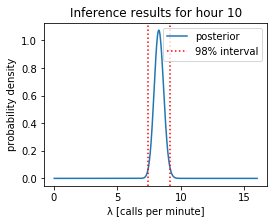

Expected value: λ = 8.27947647721 calls per minute
Posterior 98% interval: [7.4240000000000004, 9.152000000000001] calls per minute


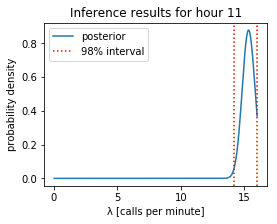

Expected value: λ = 15.2450256006 calls per minute
Posterior 98% interval: [14.144, 15.968] calls per minute


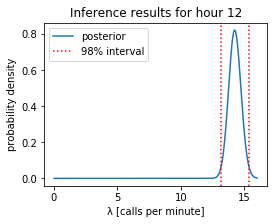

Expected value: λ = 14.2501993332 calls per minute
Posterior 98% interval: [13.120000000000001, 15.391999999999999] calls per minute


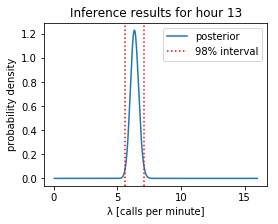

Expected value: λ = 6.3494231806 calls per minute
Posterior 98% interval: [5.6000000000000005, 7.1040000000000001] calls per minute


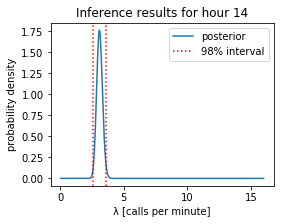

Expected value: λ = 3.09405374438 calls per minute
Posterior 98% interval: [2.5600000000000001, 3.6160000000000001] calls per minute


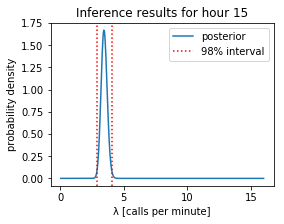

Expected value: λ = 3.4522059513 calls per minute
Posterior 98% interval: [2.9119999999999999, 4.032] calls per minute


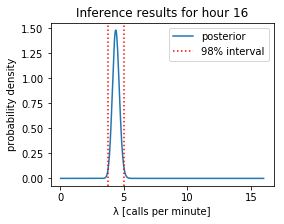

Expected value: λ = 4.37953298253 calls per minute
Posterior 98% interval: [3.7760000000000002, 5.024] calls per minute


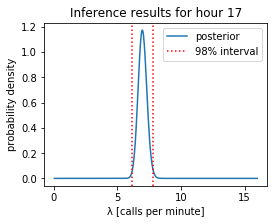

Expected value: λ = 6.97225160067 calls per minute
Posterior 98% interval: [6.1760000000000002, 7.7759999999999998] calls per minute


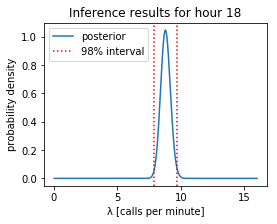

Expected value: λ = 8.79721681856 calls per minute
Posterior 98% interval: [7.9039999999999999, 9.6959999999999997] calls per minute


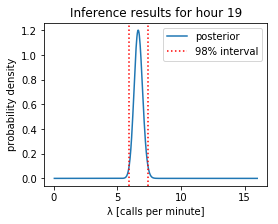

Expected value: λ = 6.64752643221 calls per minute
Posterior 98% interval: [5.8879999999999999, 7.4240000000000004] calls per minute


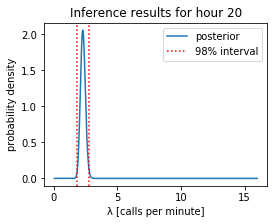

Expected value: λ = 2.28511324889 calls per minute
Posterior 98% interval: [1.8240000000000001, 2.7520000000000002] calls per minute


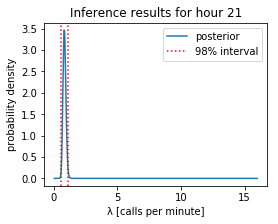

Expected value: λ = 0.830578050378 calls per minute
Posterior 98% interval: [0.57600000000000007, 1.1200000000000001] calls per minute


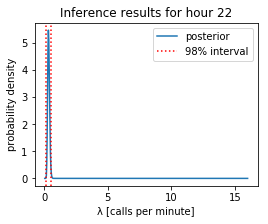

Expected value: λ = 0.340909090907 calls per minute
Posterior 98% interval: [0.16, 0.51200000000000001] calls per minute


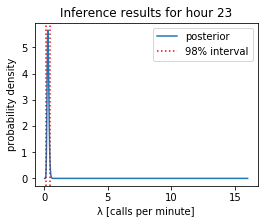

Expected value: λ = 0.294336617474 calls per minute
Posterior 98% interval: [0.128, 0.47999999999999998] calls per minute


In [10]:
def compute_percentile(parameter_values, distribution_values, percentile):
    '''
    Compute the parameter value at a particular percentile of the given
    probability distribution values. This function uses the cumulative trapezoid
    integrator in SciPy.

    Inputs:

        parameter_values (array of float) This is the list of parameter values
          at which the probability distribution has been evaluated.

        distribution_values (array of float) This is the list of values of the
          probability density function evaluated at the parameter values above.

        percentile (float) This is the value between 0 and 1 of the percentile
          to compute.

    Returns: (float) The parameter value at the given percentile.
    '''
    cumulative_distribution = sp.integrate.cumtrapz(
        distribution_values, parameter_values)
    percentile_index = np.searchsorted(cumulative_distribution, percentile)
    return lambdas[percentile_index]

percentiles_list = []
mean_list = []

for hour_index in range(0, 24, 1):
    waiting_times_hour = waiting_times_per_hour[hour_index]
    lambdas = np.linspace(0, 16, 501)[1:] # Here, it was important to define the linspace as 16 because the
                                          # maximum y-value (the call rate) is 15++
    posterior = compute_posterior(lambdas, prior, likelihood, waiting_times_hour)
    percentiles = [compute_percentile(lambdas, posterior, p) for p in [0.01, 0.99]]
    percentiles_list.append(percentiles) # Store all the percentiles in a list to plot the final graph later
    plt.figure(figsize=(4, 3))
    plt.plot(lambdas, posterior, label='posterior')
    plt.axvline(percentiles[0], color='red', linestyle=':', label='98% interval')
    plt.axvline(percentiles[1], color='red', linestyle=':')
    plt.xlabel('λ [calls per minute]')
    plt.ylabel('probability density')
    plt.title(f'Inference results for hour {hour_index}')
    plt.legend()
    plt.show()
    lambda_ = sp.integrate.trapz(posterior * lambdas, lambdas)
    mean_list.append(lambda_) # Store all the means in a list for the final graph
    print('Expected value: λ =', lambda_, 'calls per minute')

    print('Posterior 98% interval:', percentiles, 'calls per minute')


### 1. Compute a 98% posterior confidence interval over the number of calls per minute (the call rate λ ) for each hour of the day — so you will have 24 confidence intervals. Also, compute the posterior mean of λ for each hour of the day.
### 2. Present your results graphically using Matplotlib. Make a plot that looks like the one below. Each dot is at the posterior mean and each line shows a 98% confidence interval for a λ. You can use the errorbar() function in the plotting library to do this.

In [12]:
mean_list = []
percentiles_list = []

for hour_index in range(0, 24, 1):
    # Here, it was important to define the linspace as 16 because the
    # maximum y-value (the call rate) is 15++
    lambdas = np.linspace(0, 16, 501)[1:] 
    posterior = compute_posterior(lambdas, prior, likelihood, waiting_times_per_hour[hour_index])
    percentile = [compute_percentile(lambdas, posterior, p) for p in [0.01, 0.99]]
    # Storing the percentile of each hour index in the to the list created above for the plot.
    percentiles_list.append(percentile)
    lambda_ = sp.integrate.trapz(posterior * lambdas, lambdas)
    # Storing all the means in a list created above
    mean_list.append(lambda_)   

In [13]:
for hour, calls_in_hour in enumerate(waiting_times_per_hour):
    print(f'{hour:02}:00-{hour + 1:02}:00 - {percentiles_list[hour] }')

00:00-01:00 - [0.032000000000000001, 0.192]
01:00-02:00 - [0.032000000000000001, 0.16]
02:00-03:00 - [0.032000000000000001, 0.192]
03:00-04:00 - [0.064000000000000001, 0.44800000000000001]
04:00-05:00 - [0.25600000000000001, 0.64000000000000001]
05:00-06:00 - [0.64000000000000001, 1.1839999999999999]
06:00-07:00 - [1.216, 1.984]
07:00-08:00 - [2.3679999999999999, 3.3919999999999999]
08:00-09:00 - [3.6480000000000001, 4.8959999999999999]
09:00-10:00 - [5.024, 6.4640000000000004]
10:00-11:00 - [7.4240000000000004, 9.152000000000001]
11:00-12:00 - [14.144, 15.968]
12:00-13:00 - [13.120000000000001, 15.391999999999999]
13:00-14:00 - [5.6000000000000005, 7.1040000000000001]
14:00-15:00 - [2.5600000000000001, 3.6160000000000001]
15:00-16:00 - [2.9119999999999999, 4.032]
16:00-17:00 - [3.7760000000000002, 5.024]
17:00-18:00 - [6.1760000000000002, 7.7759999999999998]
18:00-19:00 - [7.9039999999999999, 9.6959999999999997]
19:00-20:00 - [5.8879999999999999, 7.4240000000000004]
20:00-21:00 - [1.8

In [14]:
##Making a list of the means of call rates for hour of the day
for hour, calls_in_hour in enumerate(waiting_times_per_hour):
    print(f'{hour:02}:00-{hour + 1:02}:00 - {mean_list[hour] }')

00:00-01:00 - 0.10031131211407818
01:00-02:00 - 0.07930325349737048
02:00-03:00 - 0.09308575728097065
03:00-04:00 - 0.24265661257731813
04:00-05:00 - 0.4423328964613409
05:00-06:00 - 0.9033121445299432
06:00-07:00 - 1.5911875564257958
07:00-08:00 - 2.881006961605615
08:00-09:00 - 4.256924597345016
09:00-10:00 - 5.728695915357027
10:00-11:00 - 8.2794764772077
11:00-12:00 - 15.24502560059755
12:00-13:00 - 14.250199333236647
13:00-14:00 - 6.349423180600143
14:00-15:00 - 3.094053744378928
15:00-16:00 - 3.452205951304311
16:00-17:00 - 4.379532982528317
17:00-18:00 - 6.972251600671261
18:00-19:00 - 8.797216818562106
19:00-20:00 - 6.6475264322062575
20:00-21:00 - 2.285113248887911
21:00-22:00 - 0.8305780503777529
22:00-23:00 - 0.340909090906545
23:00-24:00 - 0.2943366174739629


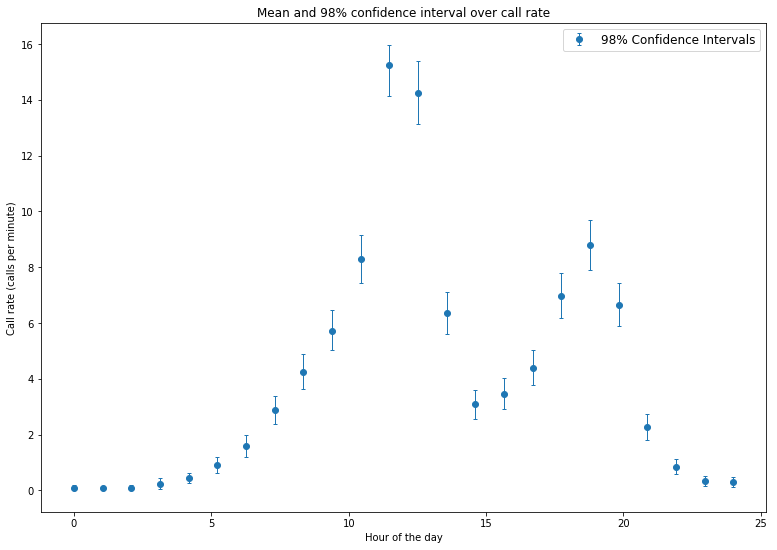

In [15]:
#  Computing the upper and lower bounds of our confidence intervals
lower_bound = [percentile[0] for percentile in percentiles_list]
upper_bound = [percentile[1] for percentile in percentiles_list]


# Computing the errors at the bounds from the results above for the errorbars
lower_error = [abs(lower_bound[i] - mean_list[i]) for i in range(24)]
upper_error = [abs(upper_bound[i] - mean_list[i]) for i in range(24)]
errors_list = [lower_error, upper_error]

#plotting the Mean and 98% confidence interval over call rate
x = np.linspace(0, 24, 24)
plt.figure(figsize=(13, 9))
plt.errorbar(x,mean_list, yerr=errors_list, fmt='o', elinewidth=1, capsize=2,
             label='98% Confidence Intervals')
plt.xlabel("Hour of the day")
plt.ylabel("Call rate (calls per minute)")
plt.title("Mean and 98% confidence interval over call rate")
plt.legend(prop={'size': 12})
plt.show()  

## Third task 
Write a paragraph (100–200 words) to accompany your plot and present your findings to the client. Carefully summarize how many calls you expect during different parts of the day, and how much uncertainty there is in your estimates. Remember that the client is not an expert in statistics, so make it easy for them to understand. You may also make additional plots to help communicate your results. 

The above plot represents the estimate at the call rate per minute for each hour of the day. Each dot represents the average number of call requests that would be expected at any given hour.  So based on our model, roughly 15 calls are expected per minute within the 11 am and 12 pm time-frame. The error bars on each dot represent our confidence or how certain we are about the expected call rate during each hour (i.e., for the previously mentioned period, we are somewhat confident that the average number of calls will lie between ~14-16). This means the actual number of calls could fall outside of the error bars, but we do not know that given this information.
That being said, from the plot, we can see a relatively low call rate in the early hours of the morning (12 midnight to 5 am ), and during the last few hours of the day ( 20:00 - 24:00). In contrast to these trends, the call rate is seen to increase rapidly (exponentially) from hours of 5:00 am to 13:00, peaking at  12 noon. Based on the results, we expect the call center to be bustling during the hours of 12 noon and 1 pm.  

## 2. Stretch goal (optional)
Explain how the compute_posterior function (reproduced below) from Lesson 2.2 works. We discussed the function briefly in class. For a complete answer you need to address all the points below. You can also add any other information you think is relevant to the techniques used in the function.

In [16]:
def compute_posterior(parameter_values, prior, likelihood, data):
    log_prior = np.log(prior(parameter_values))
    log_likelihood = np.array([
        np.sum(np.log(likelihood(param, data)))
        for param in parameter_values])
    unnormalized_log_posterior = log_prior + log_likelihood 
    unnormalized_log_posterior -= max(unnormalized_log_posterior)
    unnormalized_posterior = np.exp(unnormalized_log_posterior)
    area = sp.integrate.trapz(unnormalized_posterior, parameter_values)
    posterior = unnormalized_posterior / area
    return posterior

### 1. The purpose of the function is to multiply the prior and likelihood passed as input arguments and to return the posterior as output. Explain how the function achieves this purpose using logarithms.

The function above uses the logarithmic forms of both the prior and likelihood functions. This is shown in lines 2- 4. Then, given the product rule for logarithms; 
$log(a\times b) = log(a) + log(b)$
The sum of the $log$ of the prior to the $log$ of thelikelihood, to output the unnormalized $log$(posterior). 
This is executed in line 6 of the above code . 
The unnormalized posterior is computed in line 8 using the unction np.exp.() on the  $log$ of the posterior . 

So essentially the addition of the logarithmic forms of the prior and likelihood functions is how the function computes the posterior, which is based on the product rule for logarithms . 

### 2. What is the purpose of np.sum() in line 4?

This also stems from the product rule for logarithms.To calculate the posterior function, the product of the likelihood function(given different parameters) and prior function is computed. Since this function is using their logarithmic forms, the sum of the log of likelihood functions is computed using np.sum() function  as shown below: 

$log(n_1 \times n_2 \times n_3 \times...\times n_i) = log(n_1) + log(n_2) + log(n_3) +...+ log(n_i)$

### 3. Explain why the maximum of the unnormalized log posterior is subtracted in line 7.

This is based on the quotient rule for logarithms: $log(a\div b) = log(a) - log(b)$
Thus the subtraction of the maximum of the unnormalized log posterior is basically the division by the maximum of the unnormalized log posterior. This is done to scale the unnormalized posterior uniformly by dividing it by its maximum value. 

### 4. Why do we still have to divided by the area in line 10 even after having subtracted the maximum of the unnormalized log posterior in line 7?
This is because we still need the area under the curve to equate to one, and the command in line 7 does not help us achieve that. Hence we still need to divide the unnormalized posterior by the area to get the normalized posterior(whose area equates to 1 ). 

### 5. Create an example where not taking logarithms would cause a problem. Create a prior, likelihood, and data set that fails to produce the correct posterior when we don’t take logs. Show all your code and visualize your results on one or more plots.

Now we know that the use of logarithms is to avoid numerical overflow or underflow in Python, since when you multiply lots of likelihood values, the result can become very large or very small. Therefore, to create an example where not using the logarithmic term will cause a problem, we will have to include likelihood values that are very tiny or very big, so that the product of them will result in an underflow/overflow in Python.

In [17]:
waiting_times_day = np.loadtxt('call_center.csv')

waiting_times_per_hour = [[] for _ in range(24)]

current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)
    
    
for hour_index in range(0, 24, 1):
    waiting_times_hour = waiting_times_per_hour[hour_index]
    lambda_ = 1 / np.mean(waiting_times_hour)
    distribution = sts.expon(scale=1/lambda_)

def likelihood(lambda_, datum):
    return sts.expon(scale=1/lambda_).pdf(datum)

def prior(lambda_):
    return sts.gamma(1, scale=1/0.25).pdf(lambda_)

likelihoods = []

def compute_posterior(parameter_values, prior, likelihood, data):
    prior = prior(parameter_values)
    for param in parameter_values:
        likelihoods.append(np.prod(np.array(likelihood(param, data))))
    unnormalized_posterior = prior*likelihoods
    unnormalized_posterior /= max(unnormalized_posterior)
    area = sp.integrate.trapz(unnormalized_posterior, parameter_values)
    posterior = unnormalized_posterior / area
    return posterior

def compute_percentile(parameter_values, distribution_values, percentile):
    cumulative_distribution = sp.integrate.cumtrapz(
        distribution_values, parameter_values)
    percentile_index = np.searchsorted(cumulative_distribution, percentile)
    return lambdas[percentile_index]

percentiles_list = []
mean_list = []

for hour_index in range(0, 24, 1):
    waiting_times_hour = waiting_times_per_hour[hour_index]
    lambdas = np.linspace(0, 16, 501)[1:] 
    posterior = compute_posterior(lambdas, prior, likelihood, waiting_times_hour)
    percentiles = [compute_percentile(lambdas, posterior, p) for p in [0.01, 0.99]]
    percentiles_list.append(percentiles) 
    lambda_ = sp.integrate.trapz(posterior * lambdas, lambdas)
    mean_list.append(lambda_)

#  Computing the upper and lower bounds of our confidence intervals
lower_bound = [percentile[0] for percentile in percentiles_list]
upper_bound = [percentile[1] for percentile in percentiles_list]


# Computing the errors at the bounds from the results above for the errorbars
lower_error = [abs(lower_bound[i] - mean_list[i]) for i in range(24)]
upper_error = [abs(upper_bound[i] - mean_list[i]) for i in range(24)]
errors_list = [lower_error, upper_error]

#plotting the Mean and 98% confidence interval over call rate
x = np.linspace(0, 24, 24)
plt.figure(figsize=(13, 9))
plt.errorbar(x,mean_list, yerr=errors_list, fmt='o', elinewidth=1, capsize=2,
             label='98% Confidence Intervals')
plt.xlabel("Hour of the day")
plt.ylabel("Call rate (calls per minute)")
plt.title("Mean and 98% confidence interval over call rate")
plt.legend(prop={'size': 12})
plt.show()  

ValueError: operands could not be broadcast together with shapes (500,) (1000,) 